In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_validate

In [2]:
X_raw=pd.read_csv("train.csv",sep=",")
X_raw






,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**<font color='red'>Covert to datetime64</font>**

In [4]:
X_raw["datetime"]=X_raw.astype("datetime64[ns]")
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


**<font color='red'>Define again all of the date columns</font>**

In [5]:
X_raw['year'] = X_raw['datetime'].dt.year
X_raw['month'] = X_raw['datetime'].dt.month
X_raw['day'] = X_raw['datetime'].dt.day
X_raw['hour'] = X_raw['datetime'].dt.hour
X_raw.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,1,1,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,2011,1,1,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,2011,1,1,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,2011,1,1,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,2011,1,1,9


**<font color='red'>Dropping</font>**


In [6]:
drop_col=["datetime","casual","registered"]


In [7]:
X_raw.drop(drop_col, axis=1,inplace=True)




In [8]:
X_raw

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,336,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,241,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,168,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,129,2012,12,19,22


**<font color='red'>Reading of Test Data </font>**

In [9]:
test=pd.read_csv("test.csv")
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [10]:
test["datetime"]=test.astype("datetime64[ns]")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [11]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013,2011,1,20,5
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013,2011,1,20,6
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013,2011,1,20,7
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012,2011,1,20,8
9,2011-01-20 09:00:00,1,0,1,2,9.84,11.365,52,15.0013,2011,1,20,9


**<font color='red'>Examining of Missing Value</font>**

In [12]:
X_raw.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [13]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
month         0
day           0
hour          0
dtype: int64

**<font color='red'>Finding Relationship Between Column</font>**

<ipython-input-14-784e04ab37da>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_raw[['temp', 'windspeed']].hist(bins=20, ax=ax)


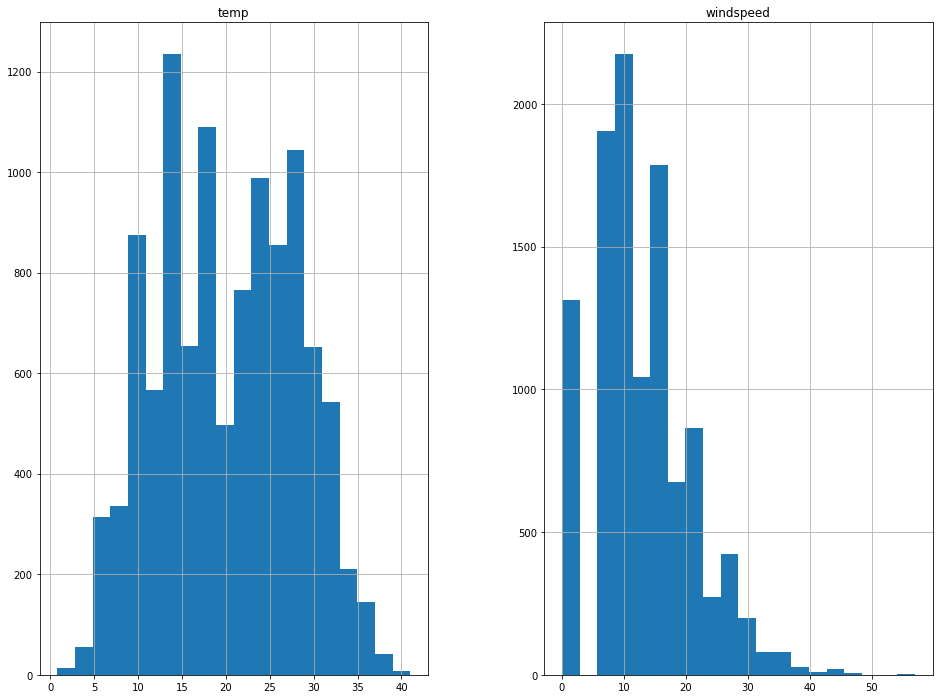

In [14]:
fig, ax = plt.subplots(figsize=(16,12))
 
X_raw[['temp', 'windspeed']].hist(bins=20, ax=ax)

plt.show()

In [15]:
#X_raw["windspeed"]=np.log1p(X_raw["windspeed"])

<ipython-input-16-784e04ab37da>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_raw[['temp', 'windspeed']].hist(bins=20, ax=ax)


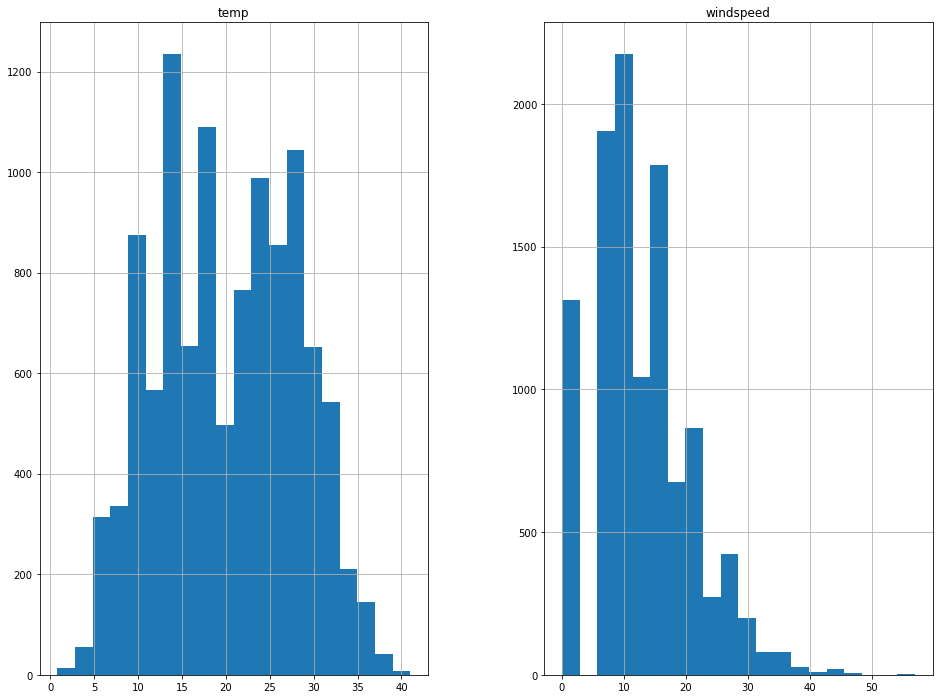

In [16]:
fig, ax = plt.subplots(figsize=(16,12))
 
X_raw[['temp', 'windspeed']].hist(bins=20, ax=ax)

plt.show()

<ipython-input-17-3ec1c10976d0>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X_raw[['temp', 'humidity']].hist(bins=20, ax=ax)


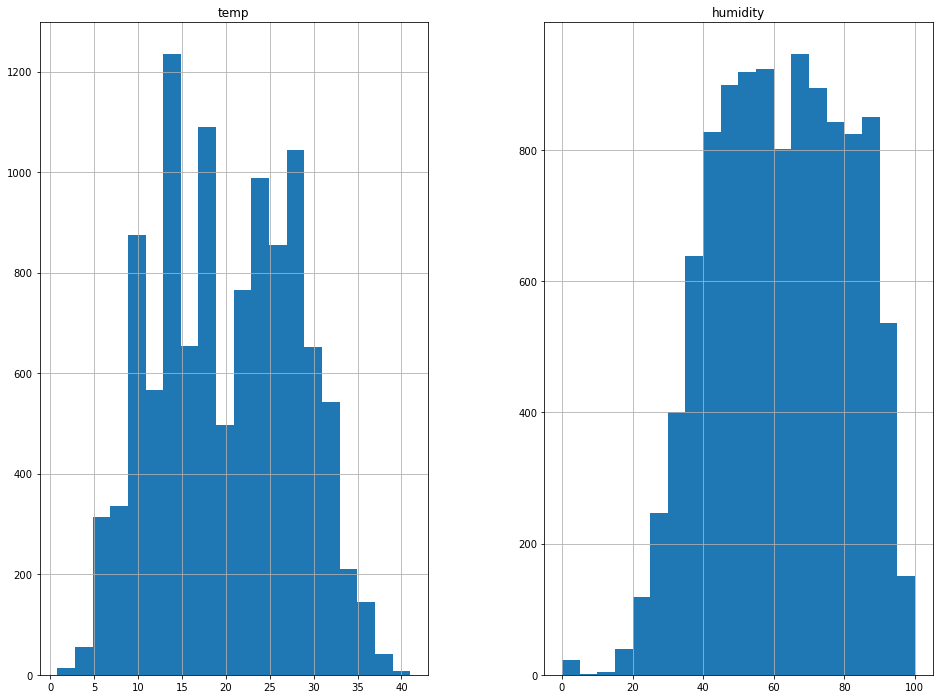

In [17]:
fig, ax = plt.subplots(figsize=(16,12))
 
X_raw[['temp', 'humidity']].hist(bins=20, ax=ax)

plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

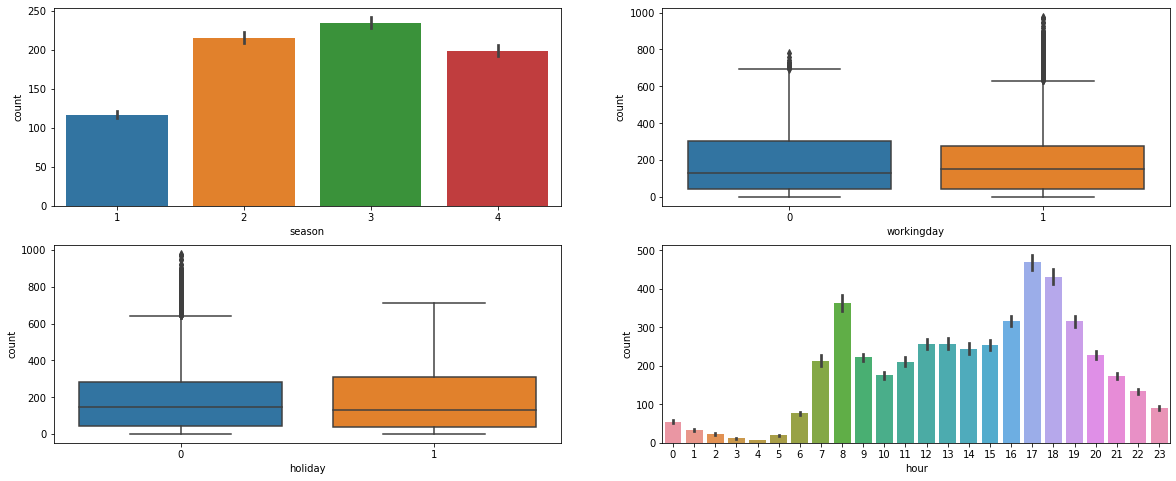

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,8)

sns.barplot(data=X_raw, x="season", y="count", ax=axes[0][0])#season
sns.boxplot(data=X_raw, x="workingday", y="count", ax=axes[0][1]) #Working day
sns.boxplot(data=X_raw, x="holiday", y="count", ax=axes[1][0]) #Holiday
sns.barplot(data=X_raw, x="hour", y="count", ax=axes[1][1]) 


(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

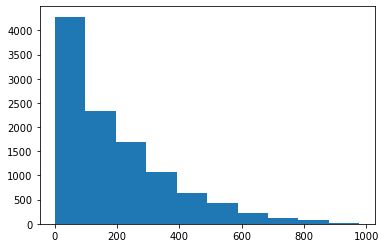

In [19]:
plt.hist(X_raw["count"])

In [20]:
X_raw["count"]=np.log1p(X_raw["count"])

In [21]:
#plt.hist(logX_raw)

(array([ 237.,  462.,  625.,  626.,  805., 1076., 1768., 2544., 2058.,
         685.]),
 array([0.69314718, 1.31238343, 1.93161968, 2.55085593, 3.17009218,
        3.78932843, 4.40856467, 5.02780092, 5.64703717, 6.26627342,
        6.88550967]),
 <BarContainer object of 10 artists>)

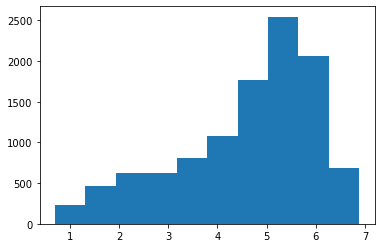

In [22]:
plt.hist(X_raw["count"])

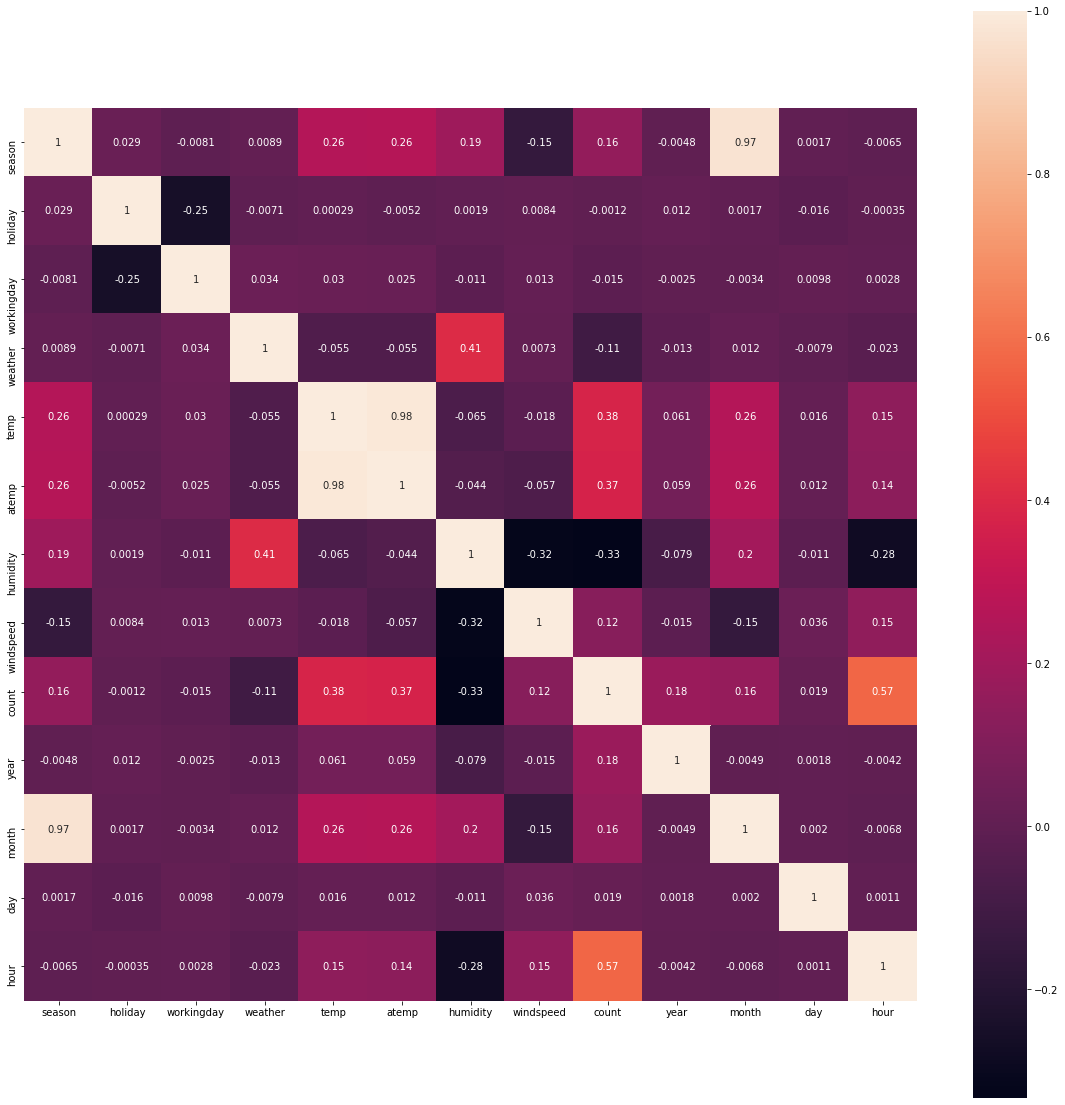

In [23]:
fig = plt.figure(figsize=[20,20]) #Heat map
ax = sns.heatmap(X_raw.corr(),annot=True,square=True)


In [24]:
drop_col2=["atemp","day"]
X_raw.drop(drop_col2,axis=1,inplace=True)


In [25]:
X_raw

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour
0,1,0,0,1,9.84,81,0.0000,2.833213,2011,1,0
1,1,0,0,1,9.02,80,0.0000,3.713572,2011,1,1
2,1,0,0,1,9.02,80,0.0000,3.496508,2011,1,2
3,1,0,0,1,9.84,75,0.0000,2.639057,2011,1,3
4,1,0,0,1,9.84,75,0.0000,0.693147,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,5.820083,2012,12,19
10882,4,0,1,1,14.76,57,15.0013,5.488938,2012,12,20
10883,4,0,1,1,13.94,61,15.0013,5.129899,2012,12,21
10884,4,0,1,1,13.94,61,6.0032,4.867534,2012,12,22


In [26]:
X_raw

,season,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,hour
0,1,0,0,1,9.84,81,0.0000,2.833213,2011,1,0
1,1,0,0,1,9.02,80,0.0000,3.713572,2011,1,1
2,1,0,0,1,9.02,80,0.0000,3.496508,2011,1,2
3,1,0,0,1,9.84,75,0.0000,2.639057,2011,1,3
4,1,0,0,1,9.84,75,0.0000,0.693147,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,5.820083,2012,12,19
10882,4,0,1,1,14.76,57,15.0013,5.488938,2012,12,20
10883,4,0,1,1,13.94,61,15.0013,5.129899,2012,12,21
10884,4,0,1,1,13.94,61,6.0032,4.867534,2012,12,22


In [27]:
X=X_raw.drop("count",axis=1)
y=X_raw["count"]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
m = LinearRegression()


In [30]:
m.fit(X_train,y_train)

LinearRegression()

In [31]:
l=m.score(X_train,y_train)
l

0.48501891621945314

In [32]:
v=m.score(X_test,y_test)
v

0.4886870325585433

In [33]:
X_train

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour
2815,3,0,1,1,27.88,83,6.0032,2011,7,5
8695,3,0,0,1,36.90,39,19.9995,2012,8,16
8406,3,0,1,1,32.80,41,16.9979,2012,7,15
1543,2,0,0,2,14.76,93,7.0015,2011,4,4
4952,4,0,0,1,13.12,45,16.9979,2011,11,10
...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,47,11.0014,2012,1,2
5191,4,0,0,1,11.48,61,19.0012,2011,12,9
5390,4,0,0,1,11.48,48,16.9979,2011,12,16
860,1,0,0,1,15.58,17,35.0008,2011,2,7


In [34]:
X_test

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour
3133,3,0,1,1,33.62,59,0.0000,2011,7,11
5786,1,1,0,1,4.10,54,6.0032,2012,1,6
5224,4,0,0,1,9.84,48,12.9980,2011,12,18
8953,3,0,1,2,29.52,62,12.9980,2012,8,10
8054,2,0,1,1,25.42,53,16.9979,2012,6,23
...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,49,19.0012,2011,5,17
5807,1,0,1,3,13.12,66,22.0028,2012,1,4
10061,4,0,0,1,16.40,40,12.9980,2012,11,14
5427,1,0,0,1,11.48,81,7.0015,2012,1,5


In [35]:
X_train["weather"].unique()

array([1, 2, 3, 4])

**As we can see that, after this dropping process I got results of my score for train and test data sets. But this result is not sufficcent. For this reason, To increase score of data model i need to examine some strategies. For example, I can expand my features. **

In [36]:
numerical_columns=["humidity","windspeed"]
categorical_columns=["holiday","workingday","weather","month","hour","season"]

In [37]:
categorical_pipeline= Pipeline([
    
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")
    )

])

In [38]:
polynomial_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False)),
    
])



In [39]:
polynomial_pipeline2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False))
    
])

In [40]:
numerical_pipeline= Pipeline([
    
    ("num_scaler",StandardScaler()),
    #("num_discritazer",KBinsDiscretizer(n_bins=15,strategy="uniform"))
    

])

In [41]:
column_transformer=ColumnTransformer([
   ("categorical_pipeline",categorical_pipeline,categorical_columns),
   ("num_scaler",numerical_pipeline,numerical_columns),
   ("polynomial",polynomial_pipeline,["hour"]),
   ("temp_pol",polynomial_pipeline2,["temp"])
])

In [42]:
column_transformer.fit(X_train)
X_train_fe =column_transformer.transform(X_train)
X_test_fe= column_transformer.transform(X_test)

In [43]:
X_train_fe.shape

(8708, 265)

In [44]:
X_train_fe

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [45]:
from sklearn.linear_model import LogisticRegression


In [46]:
Xlog_train=np.log1p(X_train_fe)

<ipython-input-46-f02f68ad6571>:1: RuntimeWarning: invalid value encountered in log1p
  Xlog_train=np.log1p(X_train_fe)


In [47]:
m = LinearRegression()

In [48]:
m.fit(X_train_fe, y_train)

LinearRegression()

In [49]:
l=m.score(X_train_fe,y_train)
l

0.8074202756415383

In [50]:
t=m.score(X_test_fe,y_test)
t

0.806073491865942

In [51]:
X_test_fe.shape

(2178, 265)

In [52]:
y_test.shape

(2178,)

In [53]:
X_train_fe

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [54]:
scores = cross_val_score(m, X_train_fe, y_train, cv=5)
scores.round(3).mean() 

-8.145306018810851e+21

In [107]:
from sklearn.linear_model import Ridge

In [108]:
m_ridge = Ridge(alpha=0.4)
m_ridge.fit(X_train_fe, y_train)
ypred_ridge_train= m_ridge.predict(X_train_fe)

In [109]:
ypred_ridge_test = m_ridge.predict(X_test_fe)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ypred_ridge_test)

0.39699982423301733

In [110]:

cross_val_score(m_ridge, X_train_fe, y_train,cv = 5).mean()

0.8034772212528332

In [111]:

cross_val_score(m_ridge, X_test_fe, y_test,cv = 5).mean()

0.7948152673847491

In [112]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test, ypred_ridge_test)

0.02116003340799484

In [113]:
test


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,2012,12,31,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,2012,12,31,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,2012,12,31,22


In [114]:
test_raw = test.drop(['atemp'], axis=1)


In [115]:
X_kaggle=test_raw
X_kaggle

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014,2012,12,31,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014,2012,12,31,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014,2012,12,31,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981,2012,12,31,22


In [116]:
X_kaggle_dt=X_kaggle[["datetime"]]
X_kaggle_dt.reset_index(inplace=True,drop=True)

In [117]:
X_kaggle_dt

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00
...,...
6488,2012-12-31 19:00:00
6489,2012-12-31 20:00:00
6490,2012-12-31 21:00:00
6491,2012-12-31 22:00:00


In [118]:
X_kaggle_drop=X_kaggle.drop(["datetime"],axis=1)

In [119]:
X_kaggle_drop

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,12,31,19
6489,1,0,1,2,10.66,60,11.0014,2012,12,31,20
6490,1,0,1,1,10.66,60,11.0014,2012,12,31,21
6491,1,0,1,1,10.66,56,8.9981,2012,12,31,22


In [120]:
numerical_columns=["humidity","windspeed"]
categorical_columns=["holiday","workingday","weather","month","hour","season"]

In [121]:
categorical_pipeline= Pipeline([
    
    ("cat_ohe",OneHotEncoder(sparse=False,handle_unknown="ignore",drop="first")
    )

])

In [122]:
polynomial_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False)),
    
])

In [123]:
polynomial_pipeline2 = Pipeline([
    ('polynomial', PolynomialFeatures(degree= 3)),
    ('categorical_ohe',OneHotEncoder(sparse=False))
    
])

In [124]:
numerical_pipeline= Pipeline([
    
    ("num_scaler",StandardScaler()),
    #("num_discritazer",KBinsDiscretizer(n_bins=15,strategy="uniform"))
    

])

In [125]:
column_transformer=ColumnTransformer([
   ("categorical_pipeline",categorical_pipeline,categorical_columns),
   ("num_scaler",numerical_pipeline,numerical_columns),
   ("polynomial",polynomial_pipeline,["hour"]),
   ("temp_pol",polynomial_pipeline2,["temp"])
])

In [126]:
column_transformer.fit(X_kaggle_drop)
X_kaggle_fe=column_transformer.transform(X_kaggle_drop)

In [127]:
X_kaggle_drop

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,56,11.0014,2011,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,60,11.0014,2012,12,31,19
6489,1,0,1,2,10.66,60,11.0014,2012,12,31,20
6490,1,0,1,1,10.66,60,11.0014,2012,12,31,21
6491,1,0,1,1,10.66,56,8.9981,2012,12,31,22


In [128]:
X_kaggle_drop.shape

(6493, 11)

In [129]:
X_train

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,hour
2815,3,0,1,1,27.88,83,6.0032,2011,7,5
8695,3,0,0,1,36.90,39,19.9995,2012,8,16
8406,3,0,1,1,32.80,41,16.9979,2012,7,15
1543,2,0,0,2,14.76,93,7.0015,2011,4,4
4952,4,0,0,1,13.12,45,16.9979,2011,11,10
...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,47,11.0014,2012,1,2
5191,4,0,0,1,11.48,61,19.0012,2011,12,9
5390,4,0,0,1,11.48,48,16.9979,2011,12,16
860,1,0,0,1,15.58,17,35.0008,2011,2,7


In [130]:
X_kaggle_fe.shape

(6493, 265)

In [131]:
X_train_fe.shape

(8708, 265)

In [132]:
Y_pred_kaggle=m_ridge.predict(X_kaggle_fe)

In [133]:
Y_pred_kaggle

array([3.00754399, 2.51704833, 2.09843357, ..., 4.41341599, 4.22819536,
       3.79011361])

In [134]:
ypred = np.exp(Y_pred_kaggle)-1

In [135]:
ypred

array([19.237635  , 11.39196561,  7.15338817, ..., 81.55097557,
       67.5933341 , 43.26142863])

In [136]:
df_y = pd.DataFrame(
            {'count': ypred,
           }
           )

In [137]:
df_y

,count
0,19.237635
1,11.391966
2,7.153388
3,3.566615
4,2.563269
...,...
6488,141.376757
6489,102.278989
6490,81.550976
6491,67.593334


In [138]:
X_final=X_kaggle_dt.join(df_y)

X_final

,datetime,count
0,2011-01-20 00:00:00,19.237635
1,2011-01-20 01:00:00,11.391966
2,2011-01-20 02:00:00,7.153388
3,2011-01-20 03:00:00,3.566615
4,2011-01-20 04:00:00,2.563269
...,...,...
6488,2012-12-31 19:00:00,141.376757
6489,2012-12-31 20:00:00,102.278989
6490,2012-12-31 21:00:00,81.550976
6491,2012-12-31 22:00:00,67.593334


In [139]:
X_final.to_csv("outzip_bike_train.csv",index=False)